# Making pool of values for DOE - BO experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Length = [28.639, 28.276, 31.121, 19.835, 33.654, 30.594, 29.529]#np.arange(12,51)
# Width = [9.008, 9.004, 7.358, 14.762, 6.926, 8.897, 8.737]#np.arange(6,26)
Length = [25.59635, 27.39105, 23.54675, 27.3818]#np.arange(12,51)
Width = [5.9023, 7.48505, 12.7644, 8.75165]#np.arange(6,26)
Thickness = 1.22 #nm average(?)
Unit_volume = 0.221445125 #nm^3
epsilon = 31947800  # (1/M*cm)ROUGH ESTIMATE from JPCC 2015, 119, 26768		 *for 4 ML NPLs with lateral size of ~300nm^2	
Cd_atoms_per_unit_volume = 4
Se_atoms_per_unit_volume = 0.875
Ag_acet_concentration = [0.006,0.0007] #M
Dilution_factor_for_OD = 100
Ag_percentage_doping = [2,5,10]  # % of doping
Optical_density_at_dilution_factor_100 = [0.15,0.3]  #Experimentally measured  
Aliquote = [0.25,0.5] #mL of NPL Aliquote for experiments from Ag_acet_concentration
Mass_Ag_acet = [3.5,7.8,14] #mg Ag_acet
Ag_Acet_mw = 166.91 #g/mol  



In [2]:
# Create nested loops to iterate through the possible values of each parameter
import pandas as pd 
from tqdm import tqdm
from itertools import product
data = { 'Dimension1(nm)': [], 'Dimension2(nm)': [],  'Dilution(%)': [], 'Nano_stock_vol(mL)': [], 
        'Diluted_vol(mL)': [], 'AgConc(M)': [], 'AgMass(mg)': [], 'MeOH_vol(mL)': [], 
        'H2O_vol(mL)': [], 'Doping(%)': [], 'AgSol(uL)': [],'Temperature(C)': [],'Time(min)':[]}
Time = [10, 60, 180] # min
Temperature = [0, 25, 50] # C
areas = []
#get combinations of L and W without considering order
# L_w_combs = list(product(Length, Width))
L_w_combs = [(L,W) for (L, W) in zip(Length, Width)]
print(L_w_combs)
depurated_L_w_combs = []
areas = []
for L, W in L_w_combs:
    if L*W not in areas:
        areas.append(L*W)
        depurated_L_w_combs.append((L,W))

total_iterations = len(depurated_L_w_combs) * len([Dilution_factor_for_OD]) * len(Optical_density_at_dilution_factor_100) * len(Aliquote) * len(Ag_acet_concentration) * len(Mass_Ag_acet) * len(Ag_percentage_doping)
with tqdm(total=total_iterations) as pbar:
    for DF in [Dilution_factor_for_OD]:
        for OD in Optical_density_at_dilution_factor_100:
            for NSV in Aliquote:
                for AAC in Ag_acet_concentration:
                    for AM in Mass_Ag_acet:
                        for DP in Ag_percentage_doping:
                            for L, W in depurated_L_w_combs:
                                    # Calculations based on spreadsheet
                                    pbar.update(1)

                                    Unique_unit_areas = L * W
                                    Unique_unit_volumes = Unique_unit_areas * Thickness  # nm^3
                                    Unique_number_qd = Unique_unit_volumes / Unit_volume  # NUMBER OF QD per unit

                                    Concentration_at_dilution = OD / epsilon  # [NPL] M at dilution
                                    Concentration = Concentration_at_dilution * DF  # [NPL] M
                                    Cd_concentration = Concentration * Unique_number_qd * Cd_atoms_per_unit_volume # [Cd] M= [NPL] M * qd_number per NPL * Cd_atoms_per_unit_volume

                                    # Solution of ag_acet to get Ag_mol of 0.006M or 0.0007M from Ag_acet mass
                                    Ag_total_sol_volume = (AM / Ag_Acet_mw) / AAC  # mL
                                    Me_OH_vol = Ag_total_sol_volume * 5 / 7  # mL MeOH
                                    Water_vol = Ag_total_sol_volume * 2 / 7  # mL H2O
                                    Cd_mols = Cd_concentration * NSV / 1000
                                    Ag_mols_needed = Cd_mols * DP / 100  # mol of Ag needed
                                    Vol_Ag_acet_needed = Ag_mols_needed / AAC * 1000 * 1000 #micro liters
                                    # Append values to lists
                                    for T in Temperature:
                                        for t in Time:
                                            data['Dimension1(nm)'].append(L)
                                            data['Dimension2(nm)'].append(W)
                                            data['Dilution(%)'].append(OD)    #wrong name, it should be OD w dilution
                                            data['Nano_stock_vol(mL)'].append(NSV)
                                            data['Diluted_vol(mL)'].append(NSV*7)
                                            data['AgConc(M)'].append(AAC)
                                            data['AgMass(mg)'].append(AM)
                                            data['MeOH_vol(mL)'].append(Me_OH_vol)
                                            data['H2O_vol(mL)'].append(Water_vol)
                                            data['Doping(%)'].append(DP)
                                            data['AgSol(uL)'].append(Vol_Ag_acet_needed)
                                            data['Time(min)'].append(t)
                                            data['Temperature(C)'].append(T)

data = pd.DataFrame(data)
display(data)

[(25.59635, 5.9023), (27.39105, 7.48505), (23.54675, 12.7644), (27.3818, 8.75165)]


100%|██████████| 288/288 [00:00<00:00, 80881.12it/s]


,Dimension1(nm),Dimension2(nm),Dilution(%),Nano_stock_vol(mL),Diluted_vol(mL),AgConc(M),AgMass(mg),MeOH_vol(mL),H2O_vol(mL),Doping(%),AgSol(uL),Temperature(C),Time(min)
0,25.59635,5.90230,0.15,0.25,1.75,0.0060,3.5,2.496355,0.998542,2,1.302633,0,10
1,25.59635,5.90230,0.15,0.25,1.75,0.0060,3.5,2.496355,0.998542,2,1.302633,0,60
2,25.59635,5.90230,0.15,0.25,1.75,0.0060,3.5,2.496355,0.998542,2,1.302633,0,180
3,25.59635,5.90230,0.15,0.25,1.75,0.0060,3.5,2.496355,0.998542,2,1.302633,25,10
4,25.59635,5.90230,0.15,0.25,1.75,0.0060,3.5,2.496355,0.998542,2,1.302633,25,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,27.38180,8.75165,0.30,0.50,3.50,0.0007,14.0,85.589325,34.235730,10,354.207616,25,60
2588,27.38180,8.75165,0.30,0.50,3.50,0.0007,14.0,85.589325,34.235730,10,354.207616,25,180
2589,27.38180,8.75165,0.30,0.50,3.50,0.0007,14.0,85.589325,34.235730,10,354.207616,50,10
2590,27.38180,8.75165,0.30,0.50,3.50,0.0007,14.0,85.589325,34.235730,10,354.207616,50,60


In [3]:
print(len(data))

2592


In [4]:
data.to_csv('Data/pool_processed.csv', index=False)

In [ ]:
def make_prompt_from_features(features,version=0):    
    if version == 0:
        prompt_template = "Stock nanoplatelets have dimensions {Dimension1_nm} nm by {Dimension2_nm} nm and the optical density of 100x hexanes dilution of stock is {Dilution_pct}% " \
                        "recorded at 512nm. {Nano_stock_vol_mL} mL nanoplatelets stock is diluted 7x by hexanes using {Diluted_vol_mL} mL for each trial of doping. " \
                        "Silver acetate solution of {AgConc_M} M is made with {AgMass_mg} mg of silver acetate in {MeOH_vol_mL} mL of MeOH and {H2O_vol_mL} mL of water. " \
                        "{Doping_pct} % Ag doping requires {AgSol_uL} uL of silver doping solution, respectively. " \
                        "The reaction was performed at 1000 rpm for {Time_min} minutes at {Temperature_C} oC. " \
                        "Fluorescence of each doped sample was collected as a 30x dilution with hexanes."
    elif version == 1:
        prompt_template = "Stock nanoplatelets have dimensions {Dimension1_nm} nm by {Dimension2_nm} nm and the optical density of 100x hexanes dilution of stock is {Dilution_pct}% "\
                        "recorded at 512nm. {Nano_stock_vol_mL} mL nanoplatelets stock is diluted 7x by hexanes using {Diluted_vol_mL} mL for each trial of doping. "\
                        "Silver acetate solution of {AgConc_M} M is made with {AgMass_mg} mg of silver acetate in {MeOH_vol_mL} mL of MeOH and {H2O_vol_mL} mL of water. "\
                        "{Doping_pct} % Ag doping requires {AgSol_uL} uL of silver doping solution, respectively. "\
                        "The reaction was performed at 1000 rpm for {Time_min} minutes at {Temperature_C} oC. "\
                        "Fluorescence of each doped sample was collected as a 30x dilution with hexanes." \
                        "Knowing that: 1) an increase in silver doping will increase the fluorescence SECONDARY PEAK AREA, "\
                        "and 2) QUANTUM YIELD decreases as Ag doping increases, although some reports indicate that theres a slight increase before decreasing."
    elif version == 2:
        prompt_template = "Stock nanoplatelets have dimensions {Dimension1_nm} nm by {Dimension2_nm} nm and the optical density of 100x hexanes dilution of stock is {Dilution_pct}% "\
                        "recorded at 512nm. {Nano_stock_vol_mL} mL nanoplatelets stock is diluted 7x by hexanes using {Diluted_vol_mL} mL for each trial of doping. "\
                        "Silver acetate solution of {AgConc_M} M is made with {AgMass_mg} mg of silver acetate in {MeOH_vol_mL} mL of MeOH and {H2O_vol_mL} mL of water. "\
                        "{Doping_pct} % Ag doping requires {AgSol_uL} uL of silver doping solution, respectively. "\
                        "The reaction was performed at 1000 rpm for {Time_min} minutes at {Temperature_C} oC. "\
                        "Fluorescence of each doped sample was collected as a 30x dilution with hexanes." \
                        "Knowing that: 1) an increase in silver doping will increase the fluorescence SECONDARY PEAK AREA, "\
                        "and 2) QUANTUM YIELD decreases as Ag doping increases, although some reports indicate that theres a slight increase before decreasing."
    elif version == 3:
        counts = float(features["Dimension1_nm"]) * float(features["Dimension2_nm"]) * 8.8968 * 4 / 0.221448125
        Dimension1_nm = features["Dimension1_nm"]
        Dimension2_nm = features["Dimension2_nm"]
        Dilution_pct = float(features["Dilution_pct"])
        prompt_template = f"Stock nanoplatelets (NPL) have dimensions {Dimension1_nm} nm by {Dimension2_nm}, which gives a total Cd count per NPL as {counts} "\
                        f"nm and the optical density of 100x hexanes dilution of stock is {Dilution_pct}% recorded at 512nm, resulting in a theoretical NPL concentration of {31900000/Dilution_pct} M. "\
                        "{Nano_stock_vol_mL} mL nanoplatelets stock is  diluted 7x by hexanes using {Diluted_vol_mL} mL for each trial of doping. "\
                        "Silver acetate solution of {AgConc_M} M is made with {AgMass_mg} mg of silver acetate in {MeOH_vol_mL} mL of MeOH and {H2O_vol_mL} mL of water. "\
                        "{Doping_pct} % Ag doping requires {AgSol_uL} uL of silver doping solution, respectively. "\
                        "The reaction was performed at 1000 rpm for {Time_min} minutes at {Temperature_C} oC. Fluorescence of "\
                        "each doped sample was collected as a 30x dilution with hexanes."
        
    elif version == 4:
        counts = float(features["Dimension1_nm"]) * float(features["Dimension2_nm"]) * 8.8968 * 4 / 0.221448125
        Dilution_pct = float(features["Dilution_pct"])
        prompt_template = "Experiment Overview: Stock nanoplatelets (NPL) have dimensions {Dimension1_nm} nm by {Dimension2_nm} nm, resulting "\
                        f"in an estimated Cd count per NPL of {counts}. "\
                        f"The optical density of a 100x hexanes dilution of stock is {Dilution_pct}% at 512 nm, yielding a theoretical NPL concentration of {31900000/Dilution_pct} M. "\
                        "{Nano_stock_vol_mL} mL nanoplatelets stock is diluted 7x in hexanes to reach {Diluted_vol_mL} mL for each doping trial. Silver acetate solution ({AgConc_M} M) "\
                        "is prepared using {AgMass_mg} mg of silver acetate in {MeOH_vol_mL} mL MeOH and {H2O_vol_mL} mL water."\
                        "Objective: This experiment investigates the relationship between Ag doping and fluorescence characteristics. Specifically: "\
                        "An increase in silver doping typically elevates the secondary peak area of fluorescence. "\
                        "Quantum yield generally decreases with Ag doping, though slight initial increases are reported."
    elif version == 5:
        prompt_template = "Stock nanoplatelets have dimensions {Dimension1_nm} nm by {Dimension2_nm} nm and the optical density of 100x hexanes dilution of stock is {Dilution_pct}% "\
                        "recorded at 512nm. {Nano_stock_vol_mL} mL nanoplatelets stock is diluted 7x by hexanes using {Diluted_vol_mL} mL for each trial of doping. "\
                        "Silver acetate solution of {AgConc_M} M is made with {AgMass_mg} mg of silver acetate in {MeOH_vol_mL} mL of MeOH and {H2O_vol_mL} mL of water. "\
                        "{Doping_pct} % Ag doping requires {AgSol_uL} uL of silver doping solution, respectively. "\
                        "The reaction was performed at 1000 rpm for {Time_min} minutes at {Temperature_C} oC. "\
                        "Fluorescence of each doped sample was collected as a 30x dilution with hexanes." \
                        "Knowing that: 1) an increase in silver doping will increase the fluorescence SECONDARY PEAK AREA, "\
                        "2) QUANTUM YIELD decreases as Ag doping increases, although some reports indicate that theres a slight increase before decreasing, "\
                        "and 3) increasing the MeOH and Water quantities, which are incompatible solvents for the NPLs in hexanes, increases the solubility of Ag but also negatively impacts the QY of NPLs"
        
        
    #check if features are as dataframe, change to kwargs
    if isinstance(features, np.ndarray):
        features = features.tolist()
        return prompt_template.format(**features)
    features = features.to_dict()
    return prompt_template.format(**features)


In [7]:
#replace the column names with the prompt names Dinemsion1(nm) -> Dimension1_nm, etc
data.columns = [col.replace('(','_').replace(')','').replace('%','pct') for col in data.columns]
print(data.columns)

Index(['Dimension1_nm', 'Dimension2_nm', 'Dilution_pct', 'Nano_stock_vol_mL',
       'Diluted_vol_mL', 'AgConc_M', 'AgMass_mg', 'MeOH_vol_mL', 'H2O_vol_mL',
       'Doping_pct', 'AgSol_uL', 'Temperature_C', 'Time_min'],
      dtype='object')


In [10]:
#make prompt from features
prompts = []
for i in range(len(data)):
    prompt = make_prompt_from_features(data.iloc[i])
    prompts.append(prompt)

#save prompts in ; separeted file
with open('Data/pools_preprocessed.txt','w') as f:
    for prompt in prompts:
        f.write(prompt + '\n')

# Extend procedures tsv file to also include CEI coordinates 

### This is done by transforming the Fluorescense Spectral distribution to CEI coordinates using the colour library

In [7]:
import colour 
from colour.plotting import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request

urllib.request.urlretrieve(
    "https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf",
    "IBMPlexMono-Regular.ttf",
)
fe = font_manager.FontEntry(fname="IBMPlexMono-Regular.ttf", name="plexmono")
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update(
    {
        "axes.facecolor": "#f5f4e9",
        "grid.color": "#AAAAAA",
        "axes.edgecolor": "#333333",
        "figure.facecolor": "#FFFFFF",
        "axes.grid": False,
        "axes.prop_cycle": plt.cycler("color", plt.cm.Dark2.colors),
        "font.family": fe.name,
        "figure.figsize": (5.0, 5.0 / 1.2),
        "ytick.left": True,
        "xtick.bottom": True,
    }
)

import random

np.random.seed(0)
random.seed(0)

### Utils

In [1]:
def get_sd_object(wavelengths, intensities):

    assert len(wavelengths) == len(intensities)
    # Process fluorescence data
    spectral_df = {wavelengths[i]: intensities[i] for i in range(len(wavelengths))}
    # print(spectral_df)
    sd = colour.SpectralDistribution(spectral_df)
    return sd


def get_xy_from_sd(sd):
    # Calculate the CIE 1931 xy chromaticity coordinates.
    xyz = colour.sd_to_XYZ(sd)
    cmfs = colour.MSDS_CMFS["CIE 1931 2 Degree Standard Observer"]
    
    illuminant = colour.SDS_ILLUMINANTS["D65"]
    
    # Calculating the sample spectral distribution *CIE XYZ* tristimulus values.
    xy = colour.XYZ_to_xy(xyz)
    return xy



In [ ]:
import pandas as pd
procedures_df = pd.read_csv('/Users/jorgemedina/BioNano-DOE/AgML/Data/processed_data.csv')
procedures_df.head()

,Dimension1(nm),Dimension2(nm),OD,Dilution(%),Nano_stock_vol(mL),Diluted_vol(mL),AgConc(M),AgMass(mg),MeOH_vol(mL),H2O_vol(mL),...,QY_peak1,QY_peak2,Fl_Wavelengths,Fluorescence,Fluorescence_norm,Abs_Wavelengths,Absorbance,Absorbance_norm,CIE_x,CIE_y
0,18.8,14.04,100x,0.175,0.25,1.75,0.0060,7.8,5,2,...,0.039617,3.074970e-01,"[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447...","[5.3922465999834595, 5.551067438955388, 5.7155...","[0.0010700124103508776, 0.0011015280811517685,...","[300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306...","[0.43802025, 0.4338412, 0.42938566666666667, 0...","[1.0, 0.9904592310515324, 0.9802872507987169, ...",0.521398,0.447538
1,18.8,14.04,100x,0.175,0.25,1.75,0.0060,7.8,5,2,...,0.000864,2.307426e-01,"[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447...","[0.05875342277612322, 0.061531410939200504, 0....","[2.1105257504146727e-05, 2.2103159460405937e-0...","[300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306...","[0.43802025, 0.4338412, 0.42938566666666667, 0...","[1.0, 0.9904592310515324, 0.9802872507987169, ...",0.650174,0.348096
2,18.8,14.04,100x,0.175,0.25,1.75,0.0060,7.8,5,2,...,0.001524,2.346841e-01,"[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447...","[0.16726935860227754, 0.17430678840129743, 0.1...","[5.7619824046038625e-05, 6.00440305483188e-05,...","[300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306...","[0.43802025, 0.4338412, 0.42938566666666667, 0...","[1.0, 0.9904592310515324, 0.9802872507987169, ...",0.639103,0.358419
3,18.8,14.04,100x,0.175,0.25,1.75,0.0060,7.8,5,2,...,0.000248,8.388796e-02,"[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447...","[0.0059593828942451415, 0.006355854469534446, ...","[5.1227292593135085e-06, 5.463539134306094e-06...","[300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306...","[0.43802025, 0.4338412, 0.42938566666666667, 0...","[1.0, 0.9904592310515324, 0.9802872507987169, ...",0.658767,0.339308
4,18.8,14.04,100x,0.175,0.25,1.75,0.0007,3.5,20,8,...,0.276434,4.928815e-08,"[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447...","[1.9618019074826825e-16, 6.15887754421026e-16,...","[5.600871903107058e-22, 1.7583367648116504e-21...","[300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306...","[0.43802025, 0.4338412, 0.42938566666666667, 0...","[1.0, 0.9904592310515324, 0.9802872507987169, ...",0.041857,0.777612


[ 0.60864266  0.38226038]


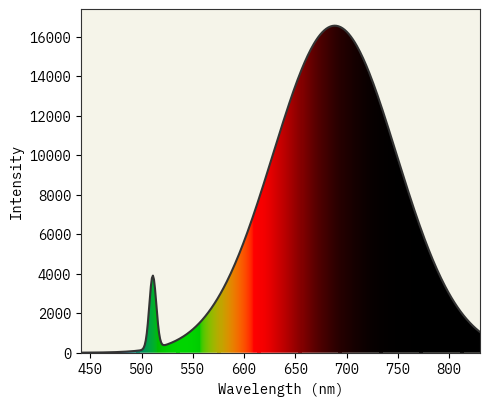

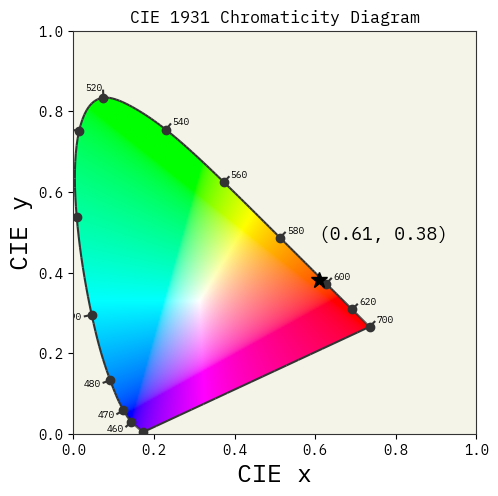

In [ ]:
#read a particular spectral data, and plot the sd and the xy chromaticity coordinates 
import pandas as pd 
import matplotlib.pyplot as plt
import colour 
raw_sd = pd.read_csv('Data/proposed_trials/NLP2/M4-R3-2_corrected.txt',header=None,sep='\t')
#wv first column, intensity second column
raw_sd.columns = ['wv','intensity']
wv = raw_sd['wv'].values
intensity = raw_sd['intensity'].values
sd = get_sd_object(wv,intensity)
xy = get_xy_from_sd(sd)
print(xy)
# plot_single_sd(sd,title = 'Trial 16 \n QY:0.8 | AUC2: 0.82 | F:0.65',x_label='Wavelength (nm)',ylabel='Intensity',axes_fontsize=30 )
plot_single_sd(
    sd,
    # title='QY:0.8 | AUC2: 0.82 | F:0.65',
    title = '',
    x_label='Wavelength (nm)',
    y_label='Intensity',
    axes_fontsize=30,
    figsize=(10, 5),
    )

#change the title to: Trial 16 QY:0.8, AUC2: 0.82, F:0.65
# plt.title('Trial 16 QY:0.8, AUC2: 0.82, F:0.65')
plt.show()
#increase font of axes labels
#increase font of edge labels

plot_chromaticity_diagram_CIE1931(show=False, title="CIE 1931 Chromaticity Diagram",fontsize=36,figure_size=(12,12))

x, y = xy   
plt.plot(x, y, "*-", color="black", markersize=12)
#add coordinates to the plot, a little higher than the point
#increase y and x label size
plt.xlabel("CIE x", fontsize=18)
plt.ylabel("CIE y", fontsize=18)
plt.text(x, y+0.1, f"({x:.2f}, {y:.2f})", fontsize=13)
plt.show()



In [25]:
len(procedures_df)

56

In [10]:
print(procedures_df.columns)

Index(['Dimension1(nm)', 'Dimension2(nm)', 'OD', 'Dilution(%)',
       'Nano_stock_vol(mL)', 'Diluted_vol(mL)', 'AgConc(M)', 'AgMass(mg)',
       'MeOH_vol(mL)', 'H2O_vol(mL)', 'Doping(%)', 'AgSol(uL)', 'Time(min)',
       'Temperature(C)', 'Experiment', 'Peak1', 'Peak2', 'Area1', 'Area2',
       'Pre-QY', 'QY', 'QY_peak1', 'QY_peak2', 'Fl_Wavelengths',
       'Fluorescence', 'Fluorescence_norm', 'Abs_Wavelengths', 'Absorbance',
       'Absorbance_norm'],
      dtype='object')


## lets plot the first three spectral distributions

Dimension1(nm)                                                    45.77
Dimension2(nm)                                                     7.29
OD                                                                 100x
Dilution(%)                                                        0.26
Nano_stock_vol(mL)                                                  0.5
Diluted_vol(mL)                                                     3.5
AgConc(M)                                                        0.0007
AgMass(mg)                                                          3.5
MeOH_vol(mL)                                                         20
H2O_vol(mL)                                                           8
Doping(%)                                                           1.0
AgSol(uL)                                                          41.1
Time(min)                                                           180
Temperature(C)                                                  

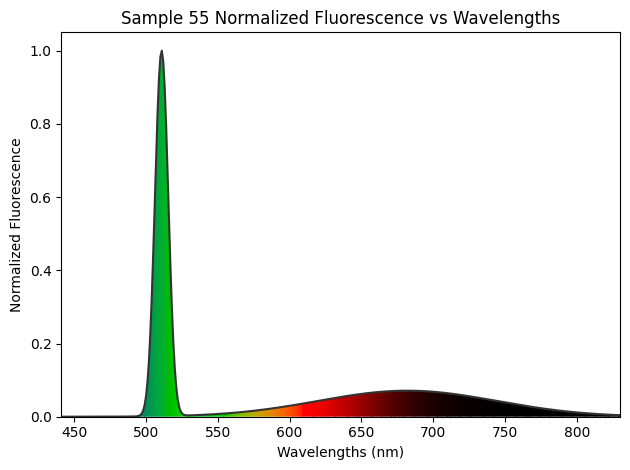

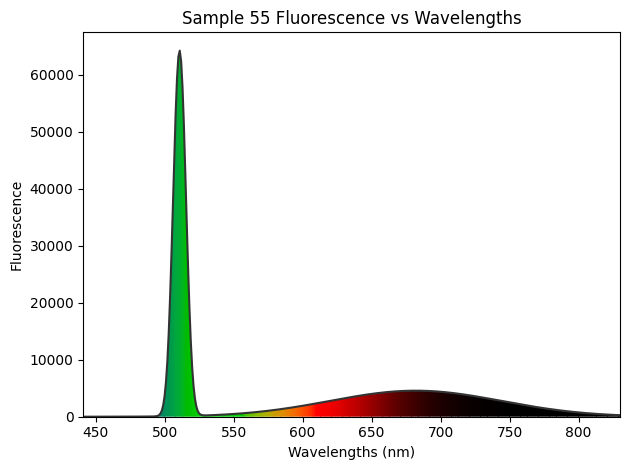

Dimension1(nm)                                                    45.77
Dimension2(nm)                                                     7.29
OD                                                                 100x
Dilution(%)                                                        0.26
Nano_stock_vol(mL)                                                  0.5
Diluted_vol(mL)                                                     3.5
AgConc(M)                                                        0.0007
AgMass(mg)                                                          3.5
MeOH_vol(mL)                                                         20
H2O_vol(mL)                                                           8
Doping(%)                                                           5.0
AgSol(uL)                                                         206.0
Time(min)                                                           180
Temperature(C)                                                  

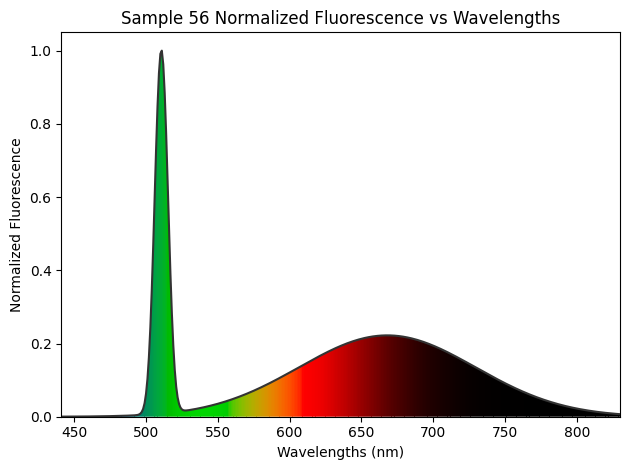

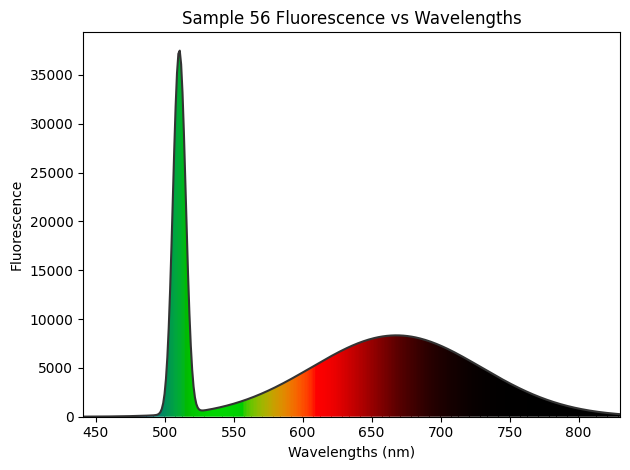

IndexError: single positional indexer is out-of-bounds

In [22]:
#plot Fluorescence_norm vs Abs_Wavelengths  for the first 3 samples of the dataframe
for i in range(54,58):
    sample = procedures_df.iloc[i]
    fl_data = sample['Fluorescence_norm']
    wavelengths = sample['Fl_Wavelengths']
    non_normal_fl_data = sample['Fluorescence']
    # print(len(fl_data),len(wavelengths),len(non_normal_fl_data))
    # print(fl_data)
    fl_data = fl_data.replace('[',"").replace(']',"").split(',')
    wavelengths = wavelengths.replace('[',"").replace(']',"").split(',')
    non_normal_fl_data = non_normal_fl_data.replace('[',"").replace(']',"").split(',')
    fl_data = [float(x) for x in fl_data]
    wavelengths = [float(x) for x in wavelengths]
    non_normal_fl_data = [float(x) for x in non_normal_fl_data]
    sd = get_sd_object(wavelengths, fl_data)
    sd_2 = get_sd_object(wavelengths, non_normal_fl_data)
    print(procedures_df.iloc[i])
    plot_single_sd(sd,title="Sample " + str(i+1) + " Normalized Fluorescence vs Wavelengths", y_label="Normalized Fluorescence", x_label="Wavelengths (nm)")
    plot_single_sd(sd_2,title="Sample " + str(i+1) + " Fluorescence vs Wavelengths", y_label="Fluorescence", x_label="Wavelengths (nm)")


## From the spectral distribution we can get the X Y coordinates in the CEI map

[ 0.50041018  0.46328608]
[ 0.64344079  0.35445577]
[ 0.63150624  0.36547876]


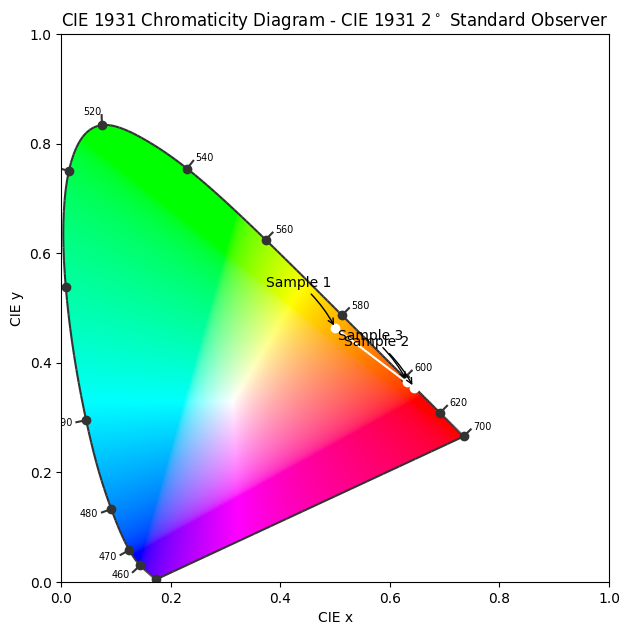

(<Figure size 640x640 with 1 Axes>,
 <Axes: title={'center': 'CIE 1931 Chromaticity Diagram - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='CIE x', ylabel='CIE y'>)

In [16]:
XY_coords = []
for i in range(3):
    sample = procedures_df.iloc[i]
    fl_data = sample['Fluorescence_norm']
    wavelengths = sample['Fl_Wavelengths']
    non_normal_fl_data = sample['Fluorescence']
    # print(fl_data)
    fl_data = fl_data.replace('[',"").replace(']',"").split(',')
    wavelengths = wavelengths.replace('[',"").replace(']',"").split(',')
    fl_data = [float(x) for x in fl_data]
    wavelengths = [float(x) for x in wavelengths]

    sd = get_sd_object(wavelengths, fl_data)
    cmfs = colour.MSDS_CMFS["CIE 1931 2 Degree Standard Observer"]
    illuminant = colour.SDS_ILLUMINANTS["D65"]
    XYZ = colour.sd_to_XYZ(sd, cmfs, illuminant)

    xy = colour.XYZ_to_xy(XYZ)
    print(xy) 
    XY_coords.append(xy)
plot_chromaticity_diagram_CIE1931(show=False)

x, y = zip(*XY_coords)   
plt.plot(x, y, "o-", color="white")

# Annotating the plot.
for i, xy in enumerate(zip(x, y)):
    plt.annotate(
        f"Sample {i+1}",
        xy=xy,
        xytext=(-50, 30),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-0.1"),
    )

render(
    show=True,
    limits=(-0.1, 0.9, -0.1, 0.9),
    x_tighten=True,
    y_tighten=True,
)

## Now we will append the CIE_x AND CIE_y coordinates in the dataframe

In [ ]:
XY_coords = {'CIE_x': [], 'CIE_y': []}
for i in range(len(procedures_df)):
    sample = procedures_df.iloc[i]
    fl_data = sample['Fluorescence_norm']
    wavelengths = sample['Fl_Wavelengths']

    fl_data = fl_data.replace('[',"").replace(']',"").split(',')
    wavelengths = wavelengths.replace('[',"").replace(']',"").split(',')

    fl_data = [float(x) for x in fl_data]
    wavelengths = [float(x) for x in wavelengths]

    sd = get_sd_object(wavelengths, fl_data)
    xy = get_xy_from_sd(sd)
    print(xy)
    XY_coords['CIE_x'].append(xy[0])
    XY_coords['CIE_y'].append(xy[1])

XY_coords = pd.DataFrame(XY_coords)
#append to procedures_df
procedures_df = pd.concat([procedures_df, XY_coords], axis=1)
#save to csv
# procedures_df.to_csv('Data/processed_data.csv', index=False)


[ 0.52139794  0.44753842]
[ 0.65017364  0.34809627]
[ 0.63910276  0.35841906]
[ 0.65876742  0.33930812]
[ 0.04185684  0.77761231]
[ 0.25137967  0.61429431]
[ 0.30873864  0.5903321 ]
[ 0.26952103  0.61162988]
[ 0.32312039  0.58209451]
[ 0.4344144   0.50830346]
[ 0.35095678  0.56492656]
[ 0.43106013  0.51080147]
[ 0.46473877  0.48713721]
[ 0.2486895   0.62103885]
[ 0.24029907  0.61757334]
[ 0.34390597  0.56894015]
[ 0.38643428  0.53915797]
[ 0.45548318  0.49121448]
[ 0.28826612  0.60060205]
[ 0.35850545  0.5591303 ]
[ 0.4639325   0.48609277]
[ 0.62461123  0.36949388]
[ 0.42491172  0.51256236]
[ 0.54483035  0.42987451]
[ 0.60566    0.3863376]
[ 0.65715504  0.34067864]
[ 0.12470777  0.64586394]
[ 0.59541789  0.39147059]
[ 0.24242132  0.6072133 ]
[ 0.2620459   0.59397436]
[ 0.20661231  0.62883254]
[ 0.43608923  0.48946504]
[ 0.02494756  0.73271775]
[ 0.34534245  0.5464695 ]
[ 0.18882361  0.6247768 ]
[ 0.43153777  0.49348917]
[ 0.02444294  0.73025461]
[ 0.35170117  0.53960968]
[ 0.14551183  